𝐼(𝑥,𝑦)=𝐼(𝑟)=𝐼𝑒 exp{−𝑏𝑛((𝑟/𝑟𝑒)(1/𝑛)−1)}

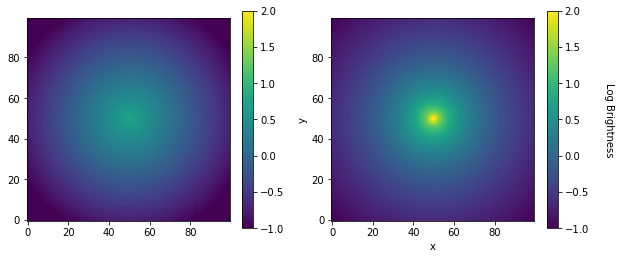

In [18]:
%matplotlib inline
import numpy as np
from astropy.modeling.models import Sersic2D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colorbar

x,y = np.meshgrid(np.arange(100), np.arange(100))

mod4 = Sersic2D(amplitude = 1, r_eff = 25, n=4, x_0=50, y_0=50, ellip=.0, theta=-3.14/2)
img4 = mod4(x, y)
log_img4 = np.log10(img4)

mod1 = Sersic2D(amplitude = 1, r_eff = 25, n=1, x_0=50, y_0=50, ellip=.0, theta=-3.14/2)
img1 = mod1(x, y)
log_img1 = np.log10(img1)

fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)


p1 = ax1.imshow(log_img1, origin='lower', interpolation='nearest', vmin=-1, vmax=2)
cbar=fig.colorbar(p1, ax=ax1)
p2 = ax2.imshow(log_img4, origin='lower', interpolation='nearest', vmin=-1, vmax=2)
cbar2=fig.colorbar(p2, ax=ax2)
cbar2.set_label('Log Brightness', rotation=270, labelpad=25)
plt.xlabel('x')
plt.ylabel('y')

plt.show()


0.00030159289474462013
0.0007015176395466009


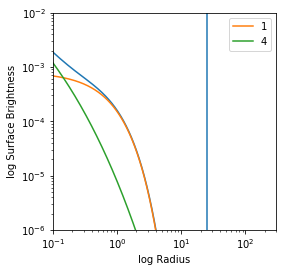

In [65]:
import numpy as np
from astropy.modeling.models import Sersic1D
import matplotlib.pyplot as plt
from math import *

plt.figure(figsize=(4,4))
plt.subplot(111, xscale='log', yscale='log')

I0=4.8e-5
Reff1=1
Ltot1=2*pi*I0*Reff1**2
print(Ltot1)
s1 = Sersic1D(amplitude=Ltot1/2, r_eff=Reff1)
s1.n = 1

I0=7.7e-4
Reff4=0.2
Ltot4=7.25*pi*I0*Reff4**2
print(Ltot4)
s4 = Sersic1D(amplitude=Ltot4/2, r_eff=Reff4)
s4.n = 4

r=np.arange(0, 300, .01)

plt.plot(r, s1(r)+s4(r))
plt.plot(r, s1(r), label=str(1))
plt.plot(r, s4(r), label=str(4))

plt.axvline(x=25)    
    
plt.axis([1e-1, 300, 1e-6, 1e-2])
plt.xlabel('log Radius')
plt.ylabel('log Surface Brightness')
plt.legend()
plt.show()